<a href="https://colab.research.google.com/github/CHADHURBALA/Image-Classification/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
digit_mnist = keras.datasets.mnist # load dataset

(train_images, train_labels), (test_images, test_labels) = digit_mnist.load_data(path="mnist.npz")



              

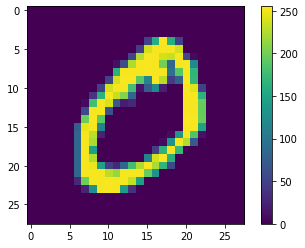

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2541 - accuracy: 0.9280
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1112 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0752 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0567 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0431 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0225 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.014

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9758
Test accuracy: 0.9757999777793884


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([4.9609703e-09, 3.9480433e-11, 2.9785584e-08, 1.4225453e-06,
       5.1565189e-12, 1.3018111e-09, 1.4989762e-12, 9.9999756e-01,
       1.2537245e-09, 9.6085012e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

Pick a number: 1
1/1 [==============================] - 0s 28ms/step


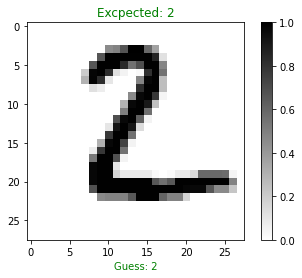

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = [0, 1, 2, 3, 4,
               5, 6, 7, 8, 9]
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + f"{label}", color='green')
  plt.xlabel("Guess: " + f"{guess}", color='green')
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
